## Importing Libraries

In [1]:
import sys
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from gplearn.genetic import SymbolicRegressor
import seaborn as sns
import matplotlib.pyplot as plt

from Model_Parent import *
from Model_Parent_2 import *

## Importing Data

In [2]:
b_df = get_bike_sharing_df() # See method in Model_Parent

In [3]:
b_df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Check Data

In [4]:
# Check to make sure that no columns have perfect colinearity

<AxesSubplot:>

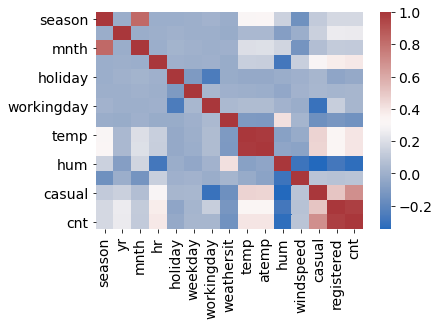

In [5]:
corr_mat = b_df.corr(method='pearson')
sns.heatmap(corr_mat, cmap='vlag')

In [6]:
# Drops the Casual and Registered rental count columns along with total rented bikes since they are essentially the same metric
X = b_df.iloc[:, :-3]
# We are trying to predict total bikes rented, not just casual or registered users
y = b_df.iloc[:, -1]

In [7]:
# Droping temp because it is perfectly correlated with atemp
b_df.drop('temp', axis=1, inplace=True)

## Generating Models

### Linear Regression

In [8]:
model = linear_model.LinearRegression()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:32:11   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573   

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


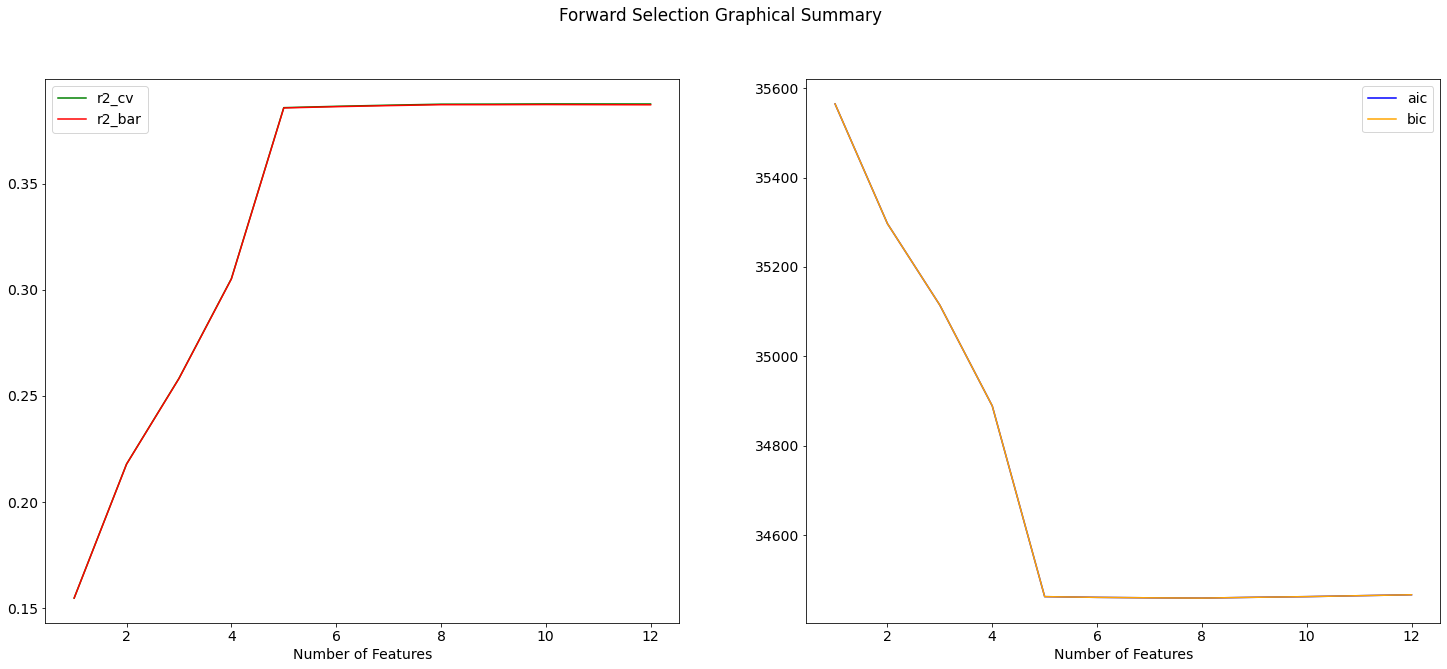

In [9]:
forwardSelection(model, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:32:13   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


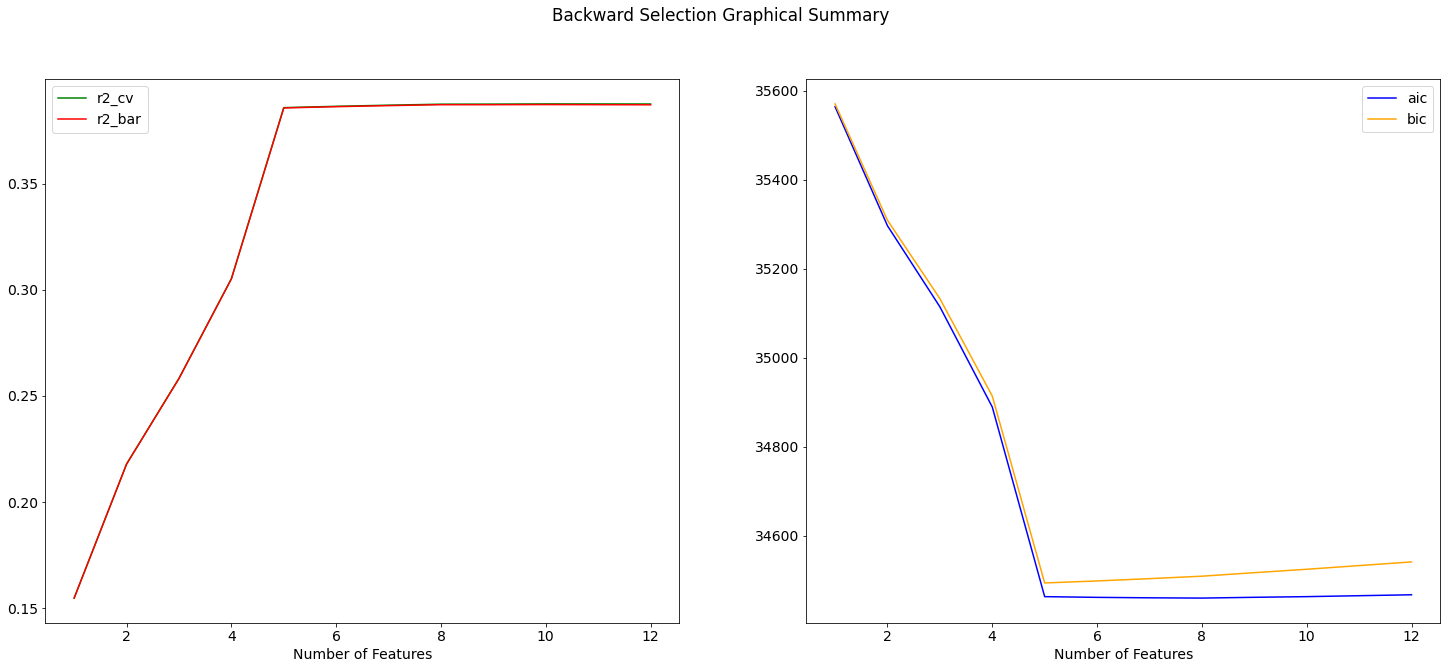

In [10]:
backwardSelection(model, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:32:14   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


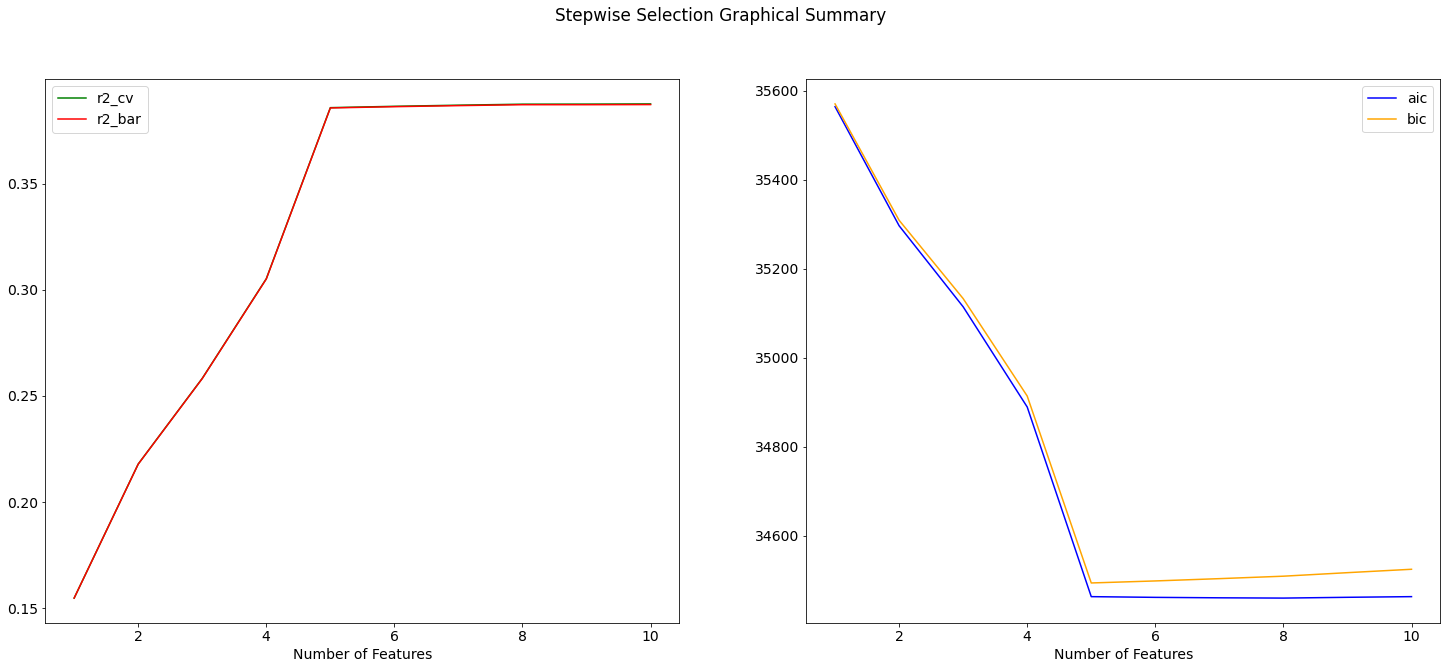

In [11]:
stepwiseSelection(model, X, y)

### Ridge Regression

In [12]:
model = linear_model.Ridge()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:32:16   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573   

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


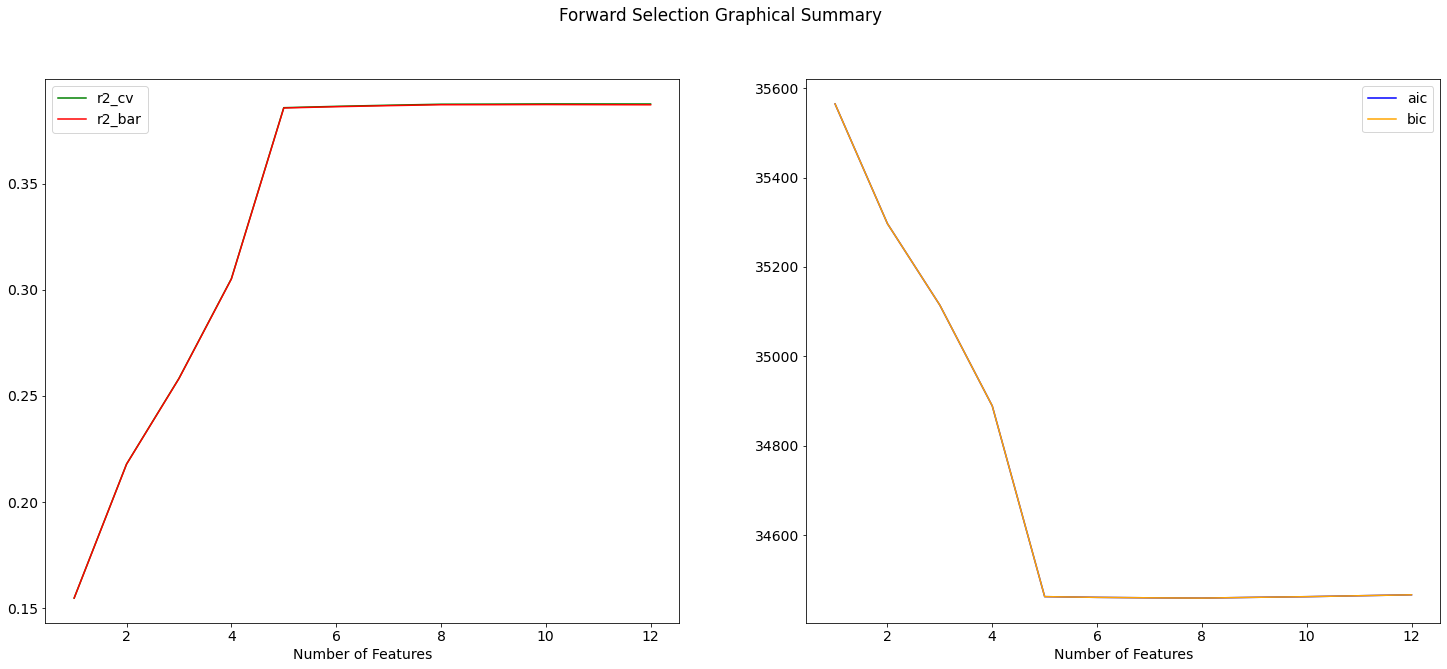

In [13]:
forwardSelection(model, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:32:17   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


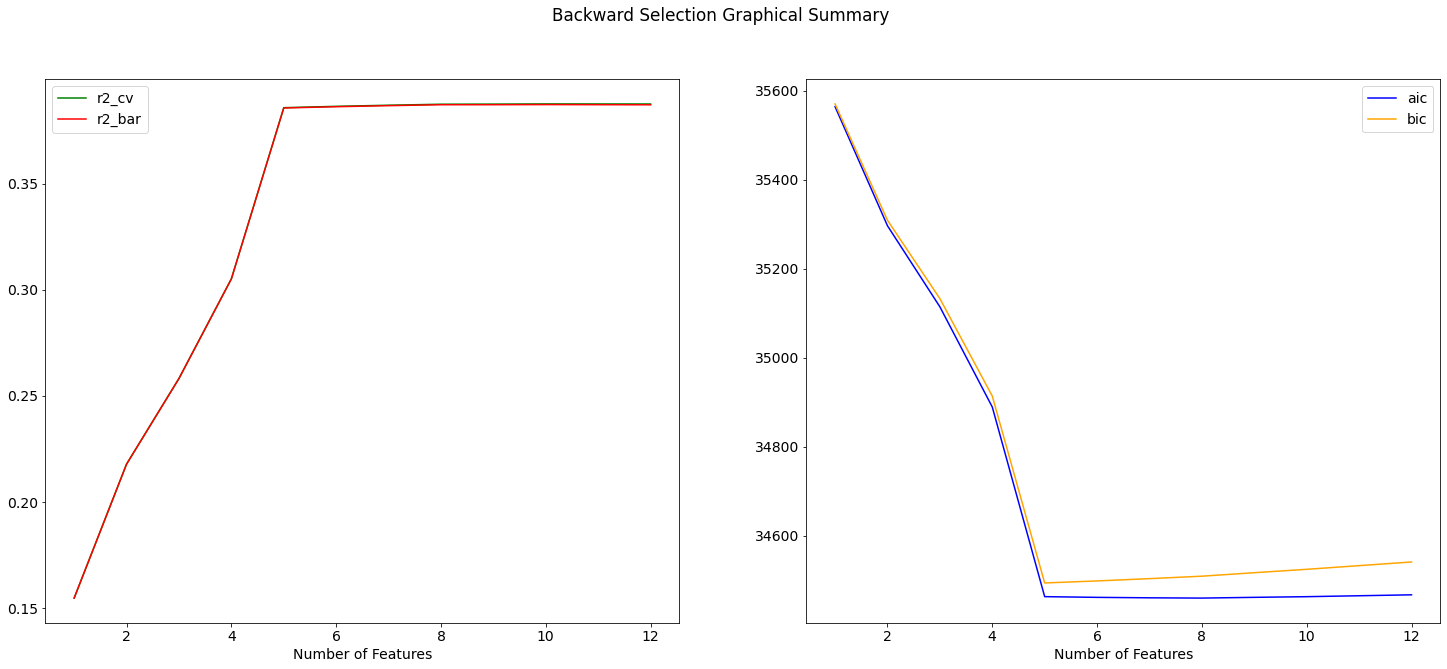

In [14]:
backwardSelection(model, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:32:18   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


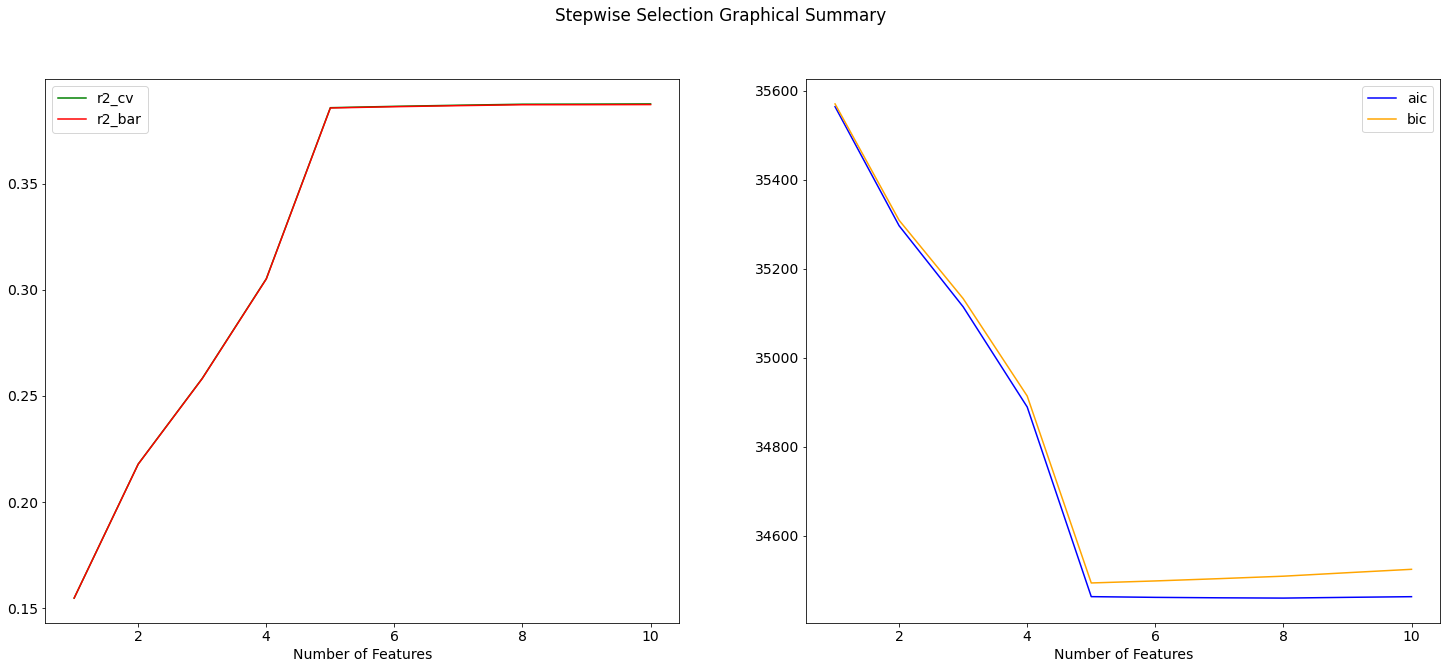

In [15]:
stepwiseSelection(model, X, y)

### Lasso Regression

In [16]:
model = linear_model.Lasso()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:32:19   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573   

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


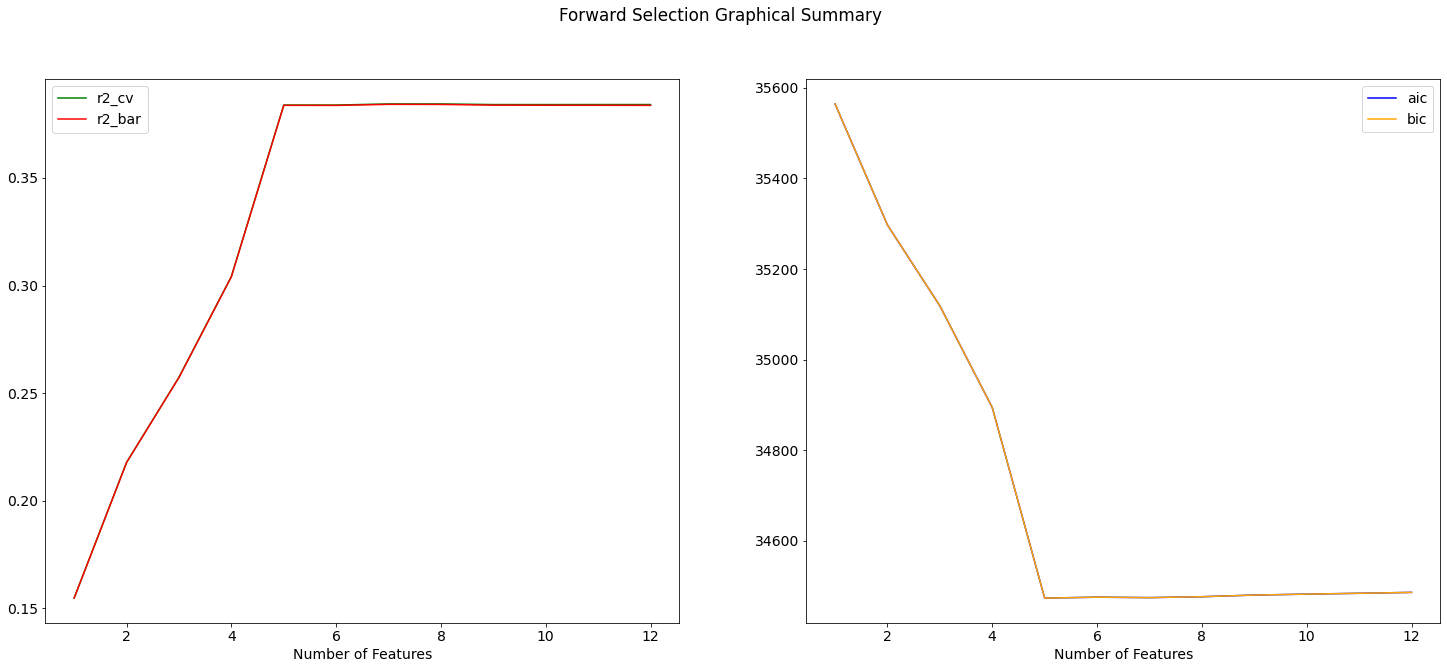

In [17]:
forwardSelection(model, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:32:21   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


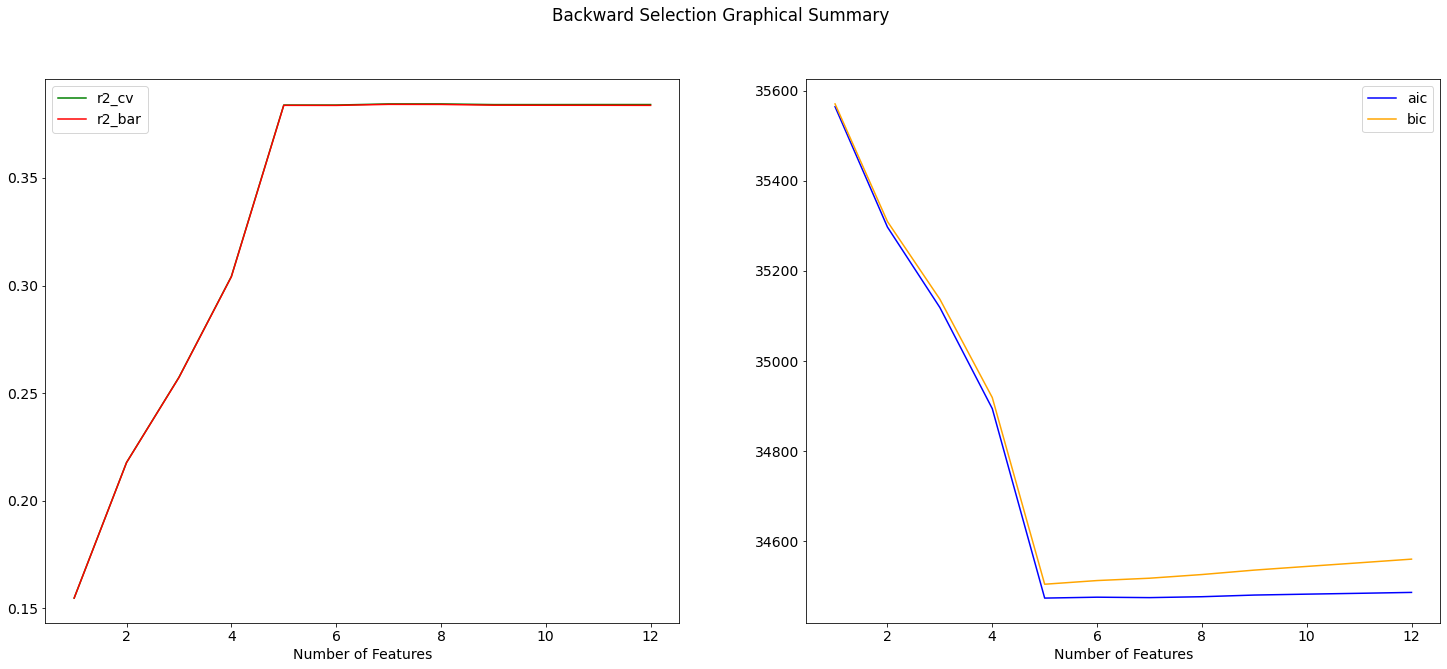

In [18]:
backwardSelection(model, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:32:23   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


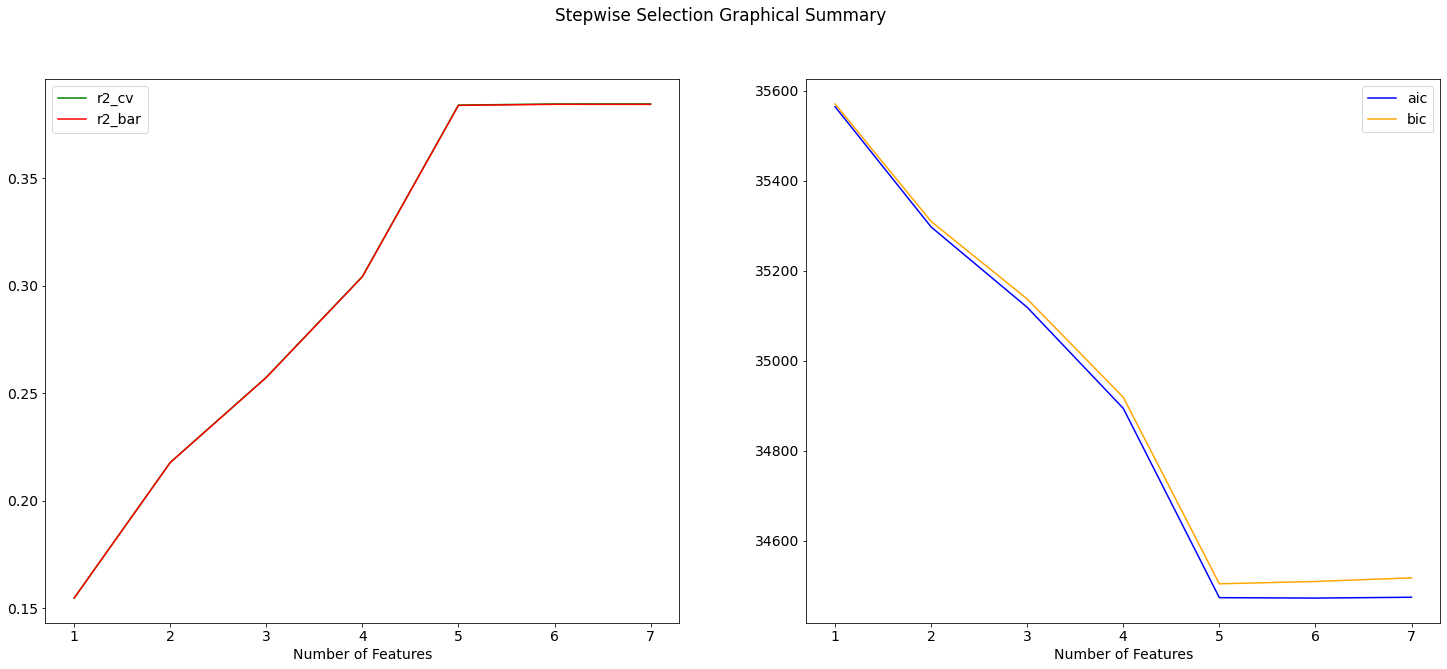

In [19]:
stepwiseSelection(model, X, y)

### Symbolic Regression

In [34]:
model = SymbolicRegressor(n_jobs=8)


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:45:09   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573   

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


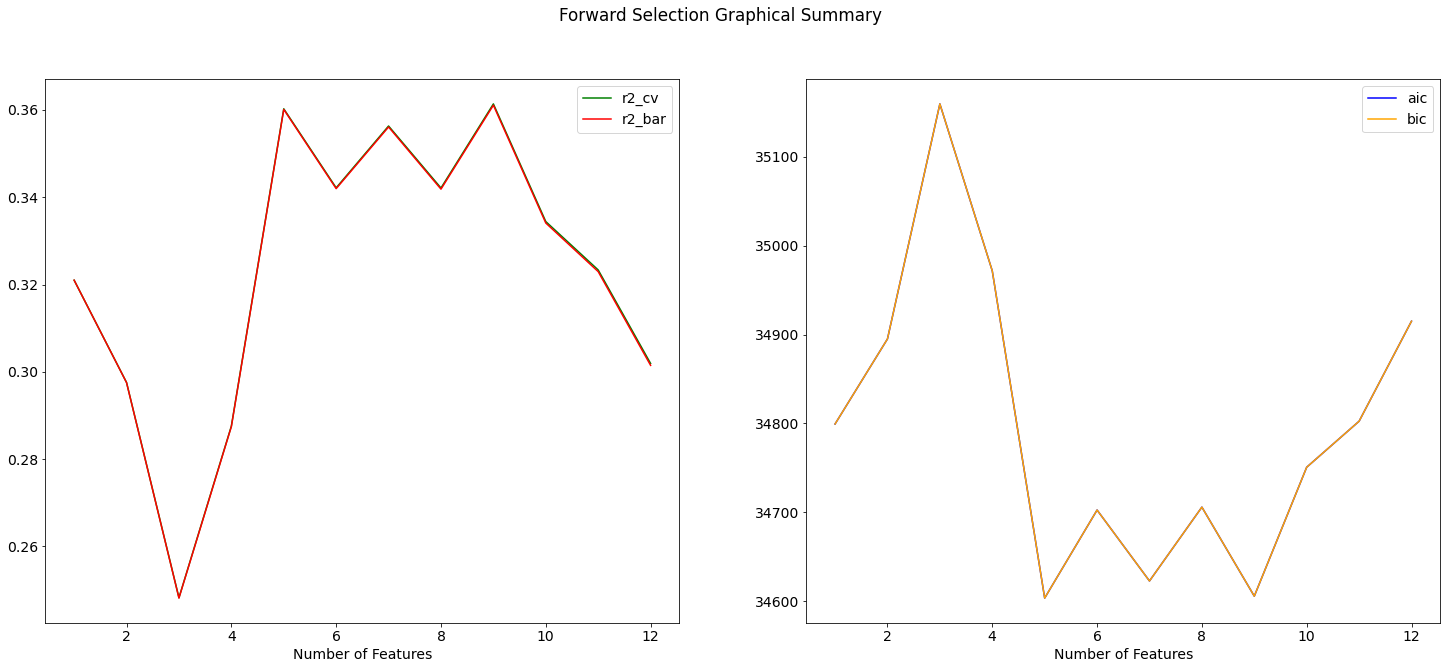

In [35]:
forwardSelection(model, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:59:30   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


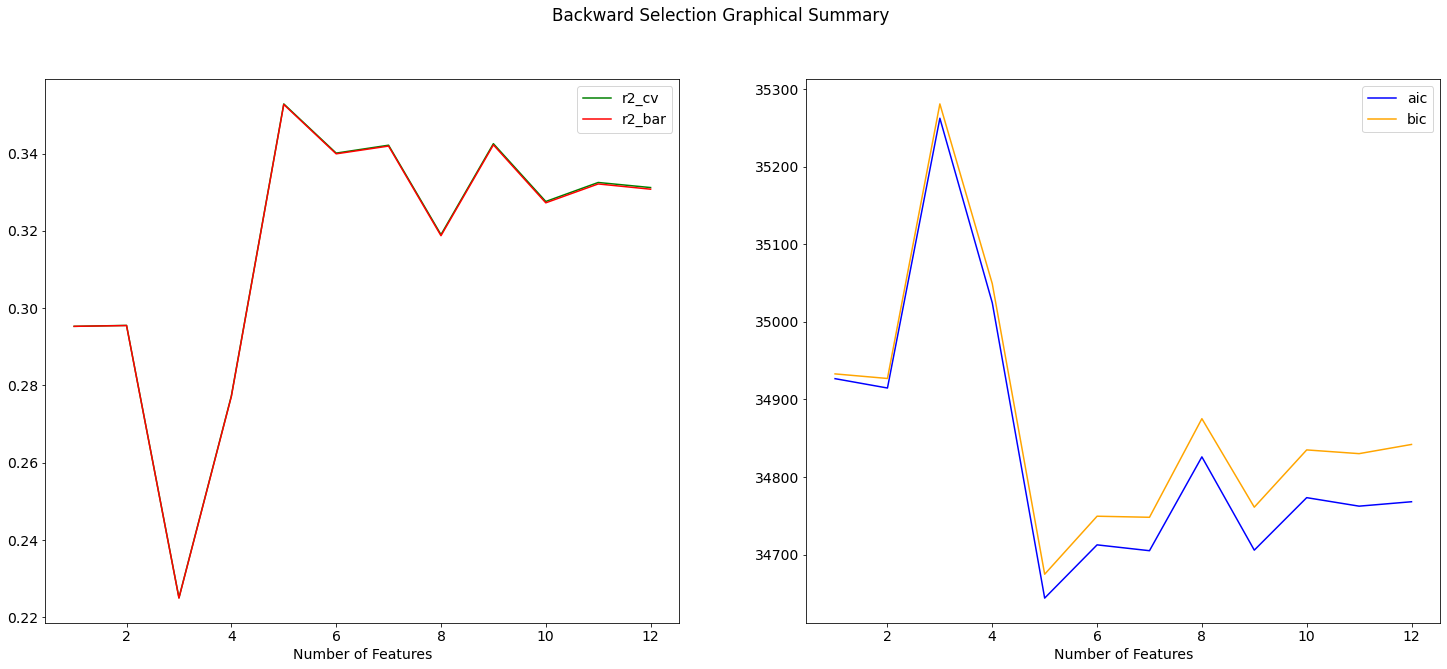

In [36]:
backwardSelection(model, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:13:11   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


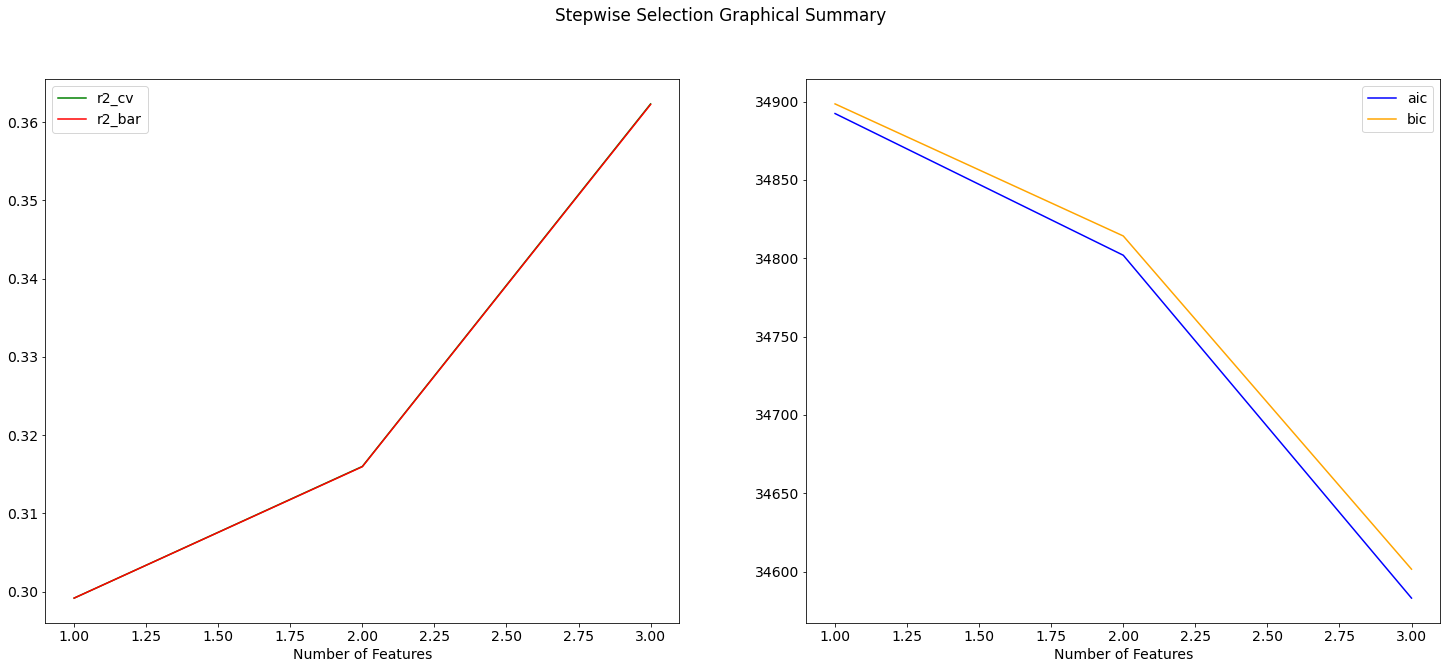

In [37]:
stepwiseSelection(model, X, y)

### Quadratic Regression

In [26]:
quad_reg = PolynomialFeatures(degree=2)
X_quad = quad_reg.fit_transform(X)
X_quad = pd.DataFrame(X_quad, columns=quad_reg.get_feature_names())
model = linear_model.LinearRegression()
X_quad.apply(lambda col: col.reset_index(drop=True))
X_quad = X_quad.drop(columns = ["1"])
y_quad = y.reset_index(drop=True)
X_quad

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x8^2,x8 x9,x8 x10,x8 x11,x9^2,x9 x10,x9 x11,x10^2,x10 x11,x11^2
0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,...,0.0576,0.069096,0.1944,0.000000,0.082886,0.233199,0.000000,0.6561,0.000000,0.000000
1,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,...,0.0484,0.059994,0.1760,0.000000,0.074365,0.218160,0.000000,0.6400,0.000000,0.000000
2,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,...,0.0484,0.059994,0.1760,0.000000,0.074365,0.218160,0.000000,0.6400,0.000000,0.000000
3,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,...,0.0576,0.069096,0.1800,0.000000,0.082886,0.215925,0.000000,0.5625,0.000000,0.000000
4,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,...,0.0576,0.069096,0.1800,0.000000,0.082886,0.215925,0.000000,0.5625,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,...,0.0676,0.066976,0.1560,0.042692,0.066358,0.154560,0.042298,0.3600,0.098520,0.026962
17375,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,...,0.0676,0.066976,0.1560,0.042692,0.066358,0.154560,0.042298,0.3600,0.098520,0.026962
17376,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,...,0.0676,0.066976,0.1560,0.042692,0.066358,0.154560,0.042298,0.3600,0.098520,0.026962
17377,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,...,0.0676,0.070902,0.1456,0.034918,0.074365,0.152712,0.036624,0.3136,0.075208,0.018036



FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     246.2
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:34:36   Log-Likelihood:            -1.0809e+05
No. Observations:               17379   AIC:                         2.164e+05
Df Residuals:                   17292   BIC:                         2.170e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -228.6917   


FORWARD SELECTION SUMMARY TABLE:

Features In Order Added: ['x3^2', 'x3', 'x6 x10', 'x1 x3', 'x3 x10', 'x3 x6', 'x1 x10', 'x6 x7', 'x10^2', 'x8', 'x10', 'x7^2', 'x6', 'x6^2', 'x1 x6', 'x7', 'x1 x11', 'x1 x9', 'x0 x3', 'x9', 'x11^2', 'x3 x8', 'x8^2', 'x4 x10', 'x1 x5', 'x1 x8', 'x3 x7', 'x4 x6', 'x4', 'x4^2', 'x4 x5', 'x11', 'x9^2', 'x8 x10', 'x3 x11', 'x7 x11', 'x6 x9', 'x0', 'x8 x11', 'x2 x10', 'x0 x11', 'x4 x11', 'x5 x9', 'x5 x8', 'x4 x7', 'x0 x4', 'x9 x10', 'x5 x7', 'x2 x4', 'x3 x5', 'x1 x7', 'x5 x10', 'x2 x11', 'x2^2', 'x2 x6', 'x2 x3', 'x1 x4', 'x7 x10', 'x0 x8', 'x1 x2', 'x2 x9', 'x6 x8', 'x0 x6', 'x0 x5', 'x0 x1', 'x5^2', 'x2 x5', 'x0 x10', 'x2', 'x3 x4', 'x7 x8', 'x7 x9', 'x9 x11', 'x8 x9', 'x5', 'x0 x2', 'x2 x8', 'x10 x11', 'x1', 'x1^2', 'x0 x9', 'x2 x7', 'x6 x11', 'x0^2', 'x5 x6', 'x3 x9', 'x5 x11', 'x4 x8', 'x0 x7', 'x4 x9']
+--------------+---------------------+---------------------+--------------------+--------------------+
| Num_Features |        r2_cv        |        r2

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


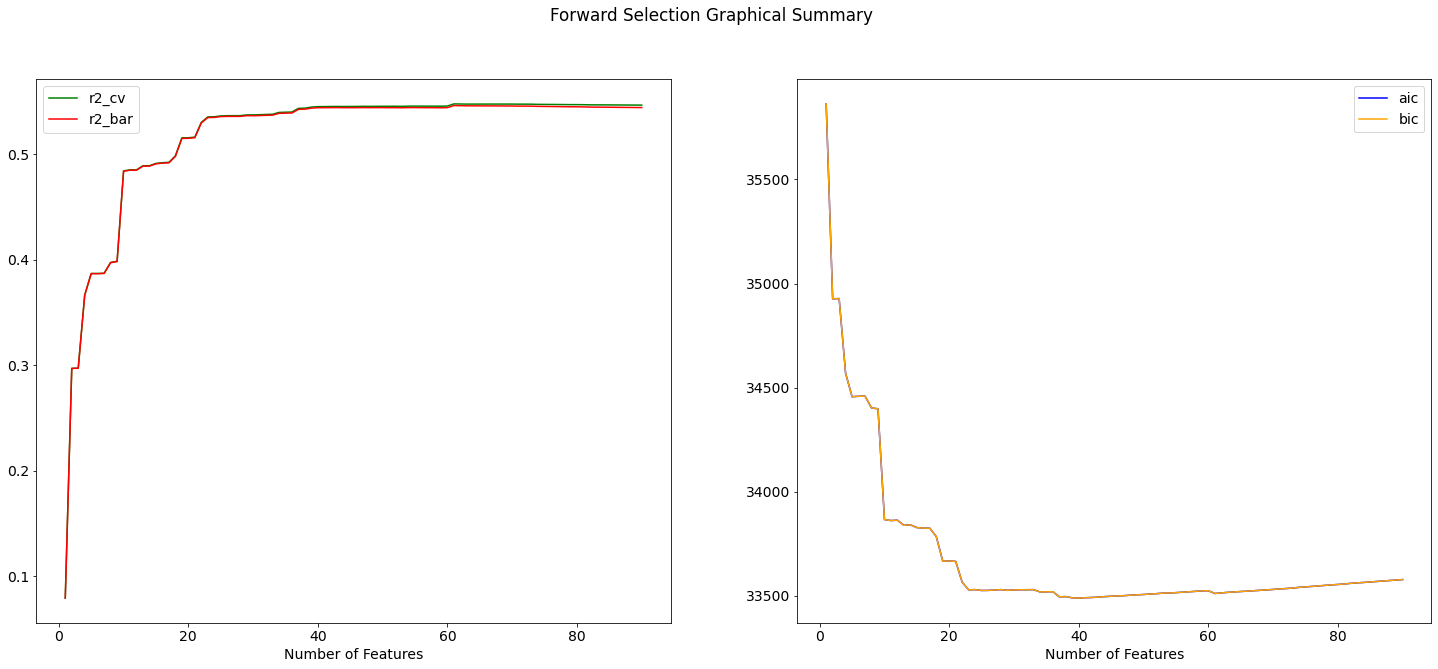

In [27]:
forwardSelection(model, X_quad, y_quad)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     246.2
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:34:50   Log-Likelihood:            -1.0809e+05
No. Observations:               17379   AIC:                         2.164e+05
Df Residuals:                   17292   BIC:                         2.170e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -228.6917  


BACKWARD SELECTION SUMMARY TABLE:

Features In Order Removed: ['x4 x9', 'x0 x7', 'x4 x8', 'x5 x11', 'x3 x9', 'x5 x6', 'x0^2', 'x6 x11', 'x2 x7', 'x0 x9', 'x1^2', 'x1', 'x10 x11', 'x2 x8', 'x0 x2', 'x5', 'x8 x9', 'x9 x11', 'x7 x9', 'x7 x8', 'x3 x4', 'x2', 'x0 x10', 'x2 x5', 'x5^2', 'x0 x1', 'x0 x5', 'x0 x6', 'x6 x8', 'x2 x9', 'x1 x2', 'x0 x8', 'x7 x10', 'x1 x4', 'x2 x3', 'x2 x6', 'x2^2', 'x2 x11', 'x5 x10', 'x1 x7', 'x3 x5', 'x2 x4', 'x5 x7', 'x9 x10', 'x0 x4', 'x4 x7', 'x5 x8', 'x5 x9', 'x4 x11', 'x0 x11', 'x2 x10', 'x8 x11', 'x0', 'x6 x9', 'x7 x11', 'x3 x11', 'x8 x10', 'x9^2', 'x11', 'x4 x5', 'x4^2', 'x4', 'x4 x6', 'x3 x7', 'x1 x8', 'x1 x5', 'x4 x10', 'x8^2', 'x3 x8', 'x11^2', 'x9', 'x0 x3', 'x1 x9', 'x1 x11', 'x7', 'x1 x6', 'x6^2', 'x6', 'x7^2', 'x10', 'x8', 'x10^2', 'x6 x7', 'x1 x10', 'x3 x6', 'x3 x10', 'x1 x3', 'x6 x10', 'x3', 'x3^2']
+--------------+---------------------+---------------------+--------------------+--------------------+
| Num_Features |        r2_cv        |       

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


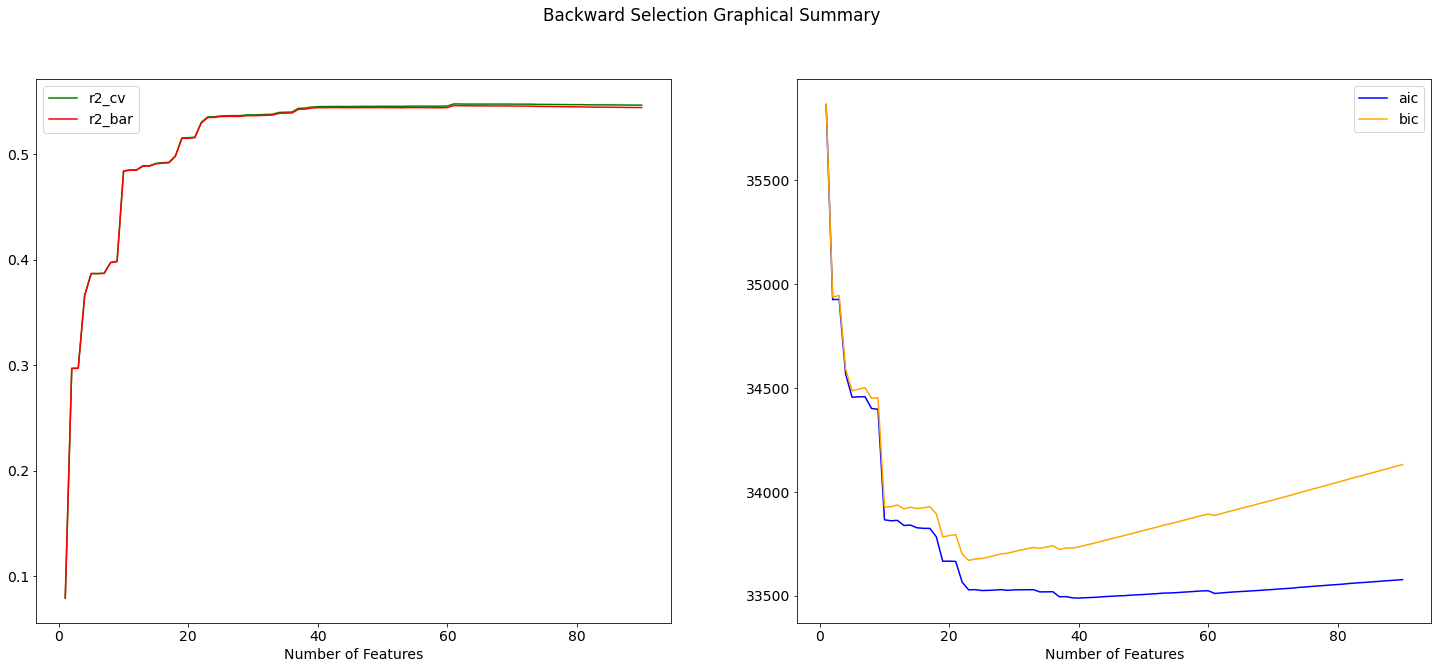

In [28]:
backwardSelection(model, X_quad, y_quad)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     246.2
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:35:03   Log-Likelihood:            -1.0809e+05
No. Observations:               17379   AIC:                         2.164e+05
Df Residuals:                   17292   BIC:                         2.170e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -228.6917  


STEPWISE SELECTION SUMMARY TABLE:

Features Added: ['x0 x4', 'x1 x3', 'x8 x9', 'x3 x7', 'x2 x11', 'x8 x10', 'x7 x8', 'x4 x8', 'x10^2', 'x10', 'x0 x2', 'x1 x10', 'x4^2', 'x6 x7', 'x3 x11', 'x9^2', 'x7', 'x8', 'x4 x9', 'x1 x7', 'x0 x9', 'x2 x9', 'x4', 'x11', 'x3 x5', 'x3 x10', 'x2 x3', 'x7^2', 'x5 x6', 'x6 x11', 'x2^2', 'x1^2', 'x9 x11', 'x3^2', 'x0^2', 'x5 x8', 'x4 x10', 'x6 x8', 'x2 x5', 'x7 x10', 'x1 x11', 'x3 x9', 'x0', 'x5 x7', 'x0 x10', 'x7 x11', 'x2 x10', 'x4 x6', 'x1 x8', 'x5 x9', 'x6^2', 'x8^2', 'x9 x10', 'x1 x6', 'x3 x8', 'x5']
Features Dropped: ['x2 x4', 'x3 x4', 'x1 x4', 'x2 x6', 'x5^2', 'x0 x1', 'x4 x5', 'x4 x7', 'x6 x9', 'x1', 'x11^2', 'x7 x9', 'x0 x3', 'x1 x9', 'x0 x6', 'x8 x11', 'x6 x10', 'x2 x8', 'x10 x11', 'x5 x11', 'x2 x7', 'x3 x6', 'x4 x11', 'x0 x7', 'x3', 'x1 x5', 'x0 x11', 'x6', 'x0 x5', 'x5 x10', 'x2', 'x0 x8', 'x9', 'x1 x2']
+--------------+---------------------+---------------------+--------------------+--------------------+
| Num_Features |        r2_cv        

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


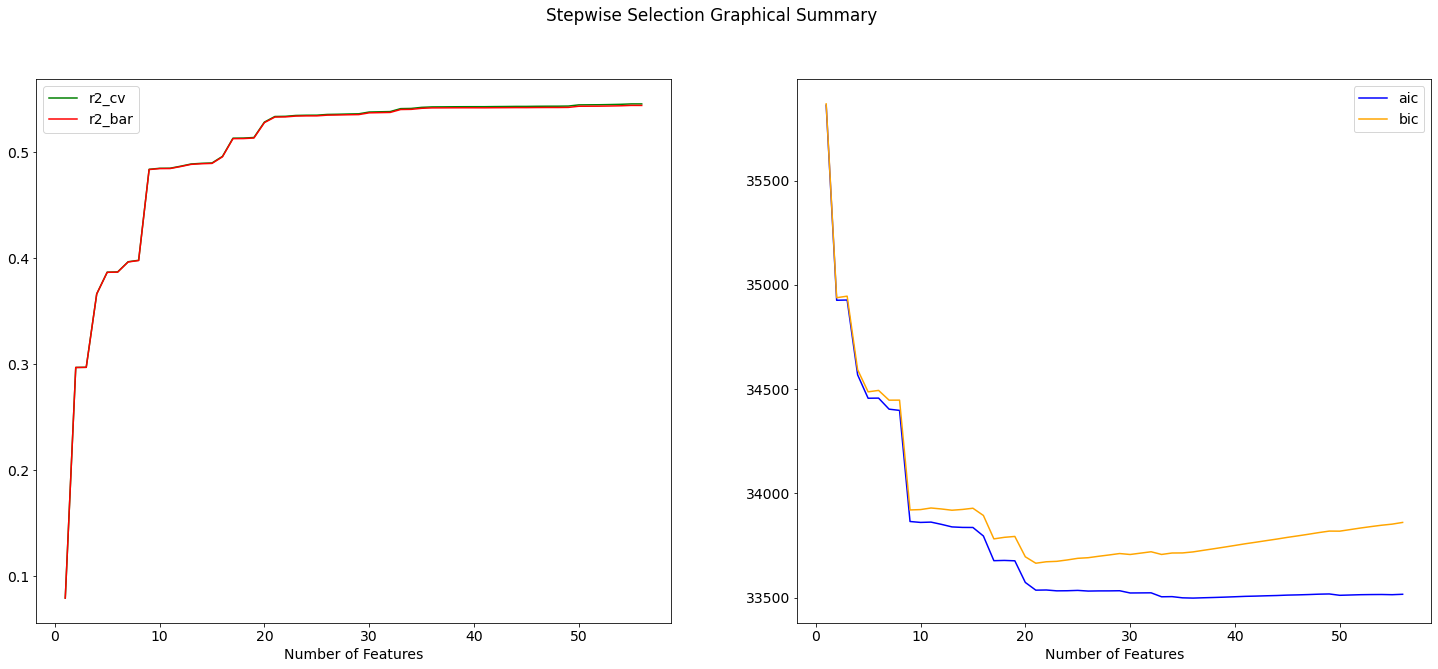

In [29]:
stepwiseSelection(model, X_quad, y_quad)

### Cubic Regression

In [30]:
cub_reg = PolynomialFeatures(degree=3)
X_cub = cub_reg.fit_transform(X)
X_cub = pd.DataFrame(X_cub, columns=cub_reg.get_feature_names())
model = linear_model.LinearRegression()
X_cub.apply(lambda col: col.reset_index(drop=True))
X_cub = X_cub.drop(columns = ["1"])
y_cub = y.reset_index(drop=True)
X_cub

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x9^3,x9^2 x10,x9^2 x11,x9 x10^2,x9 x10 x11,x9 x11^2,x10^3,x10^2 x11,x10 x11^2,x11^3
0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,...,0.023863,0.067138,0.000000,0.188891,0.000000,0.000000,0.531441,0.000000,0.000000,0.000000
1,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,...,0.020279,0.059492,0.000000,0.174528,0.000000,0.000000,0.512000,0.000000,0.000000,0.000000
2,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,...,0.020279,0.059492,0.000000,0.174528,0.000000,0.000000,0.512000,0.000000,0.000000,0.000000
3,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,...,0.023863,0.062165,0.000000,0.161944,0.000000,0.000000,0.421875,0.000000,0.000000,0.000000
4,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,...,0.023863,0.062165,0.000000,0.161944,0.000000,0.000000,0.421875,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,...,0.017094,0.039815,0.010896,0.092736,0.025379,0.006945,0.216000,0.059112,0.016177,0.004427
17375,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,...,0.017094,0.039815,0.010896,0.092736,0.025379,0.006945,0.216000,0.059112,0.016177,0.004427
17376,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,...,0.017094,0.039815,0.010896,0.092736,0.025379,0.006945,0.216000,0.059112,0.016177,0.004427
17377,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,...,0.020279,0.041645,0.009987,0.085519,0.020509,0.004919,0.175616,0.042116,0.010100,0.002422



FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     76.25
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:35:16   Log-Likelihood:            -1.0606e+05
No. Observations:               17379   AIC:                         2.129e+05
Df Residuals:                   16975   BIC:                         2.161e+05
Df Model:                         403                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        164.2736   


FORWARD SELECTION SUMMARY TABLE:

Features In Order Added: ['x3^3', 'x3^2', 'x1 x3^2', 'x3^2 x7', 'x1 x3', 'x1^2 x3', 'x3 x6 x10', 'x3', 'x0 x3^2', 'x3^2 x10', 'x3 x6', 'x3 x6^2', 'x2^2 x6', 'x3^2 x9', 'x7^2 x10', 'x3 x7', 'x1 x3 x6', 'x3^2 x8', 'x1 x6 x10', 'x3 x10^2', 'x1 x2 x6', 'x3^2 x6', 'x6 x9 x10', 'x3 x10', 'x3 x5 x6', 'x5^2 x10', 'x0 x1 x6', 'x1 x3 x10', 'x6 x10^2', 'x5 x10', 'x6 x8 x10', 'x0 x7 x11', 'x3 x11', 'x2 x6', 'x2 x6^2', 'x1 x6 x9', 'x4 x5^2', 'x1 x6 x11', 'x0 x5 x8', 'x0^2 x6', 'x2 x6 x10', 'x0 x6^2', 'x0 x6', 'x0 x5 x9', 'x10^2 x11', 'x0 x2 x9', 'x7 x8', 'x1 x6 x8', 'x2^2 x3', 'x3^2 x11', 'x0 x3', 'x0 x2 x8', 'x2 x3^2', 'x3 x5 x7', 'x1 x6 x7', 'x7^2 x8', 'x6 x7 x10', 'x2 x7 x10', 'x0 x2 x7', 'x3 x5', 'x10 x11', 'x1^3', 'x1^2', 'x1', 'x3 x5^2', 'x6 x10 x11', 'x3 x8 x10', 'x8^3', 'x7 x10^2', 'x7^2 x9', 'x7 x9', 'x3 x10 x11', 'x7 x8^2', 'x0 x5 x6', 'x0 x5 x10', 'x0 x1 x2', 'x11', 'x7 x10', 'x3 x7 x10', 'x3 x4 x10', 'x0 x2 x10', 'x1 x5 x9', 'x0 x6 x7', 'x11^2', 'x0 x6

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


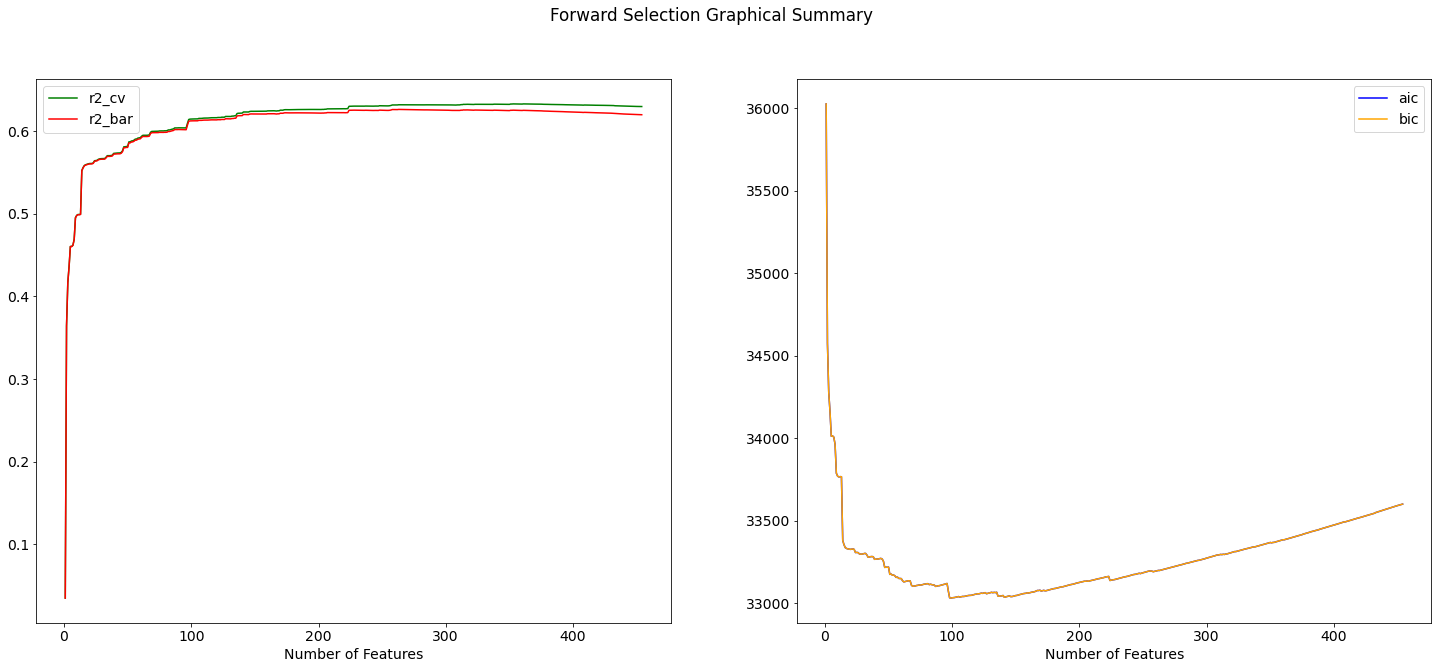

In [31]:
forwardSelection(model, X_cub, y_cub)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     76.25
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:39:06   Log-Likelihood:            -1.0606e+05
No. Observations:               17379   AIC:                         2.129e+05
Df Residuals:                   16975   BIC:                         2.161e+05
Df Model:                         403                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        164.2736  


BACKWARD SELECTION SUMMARY TABLE:

Features In Order Removed: ['x5 x8 x9', 'x4 x9 x10', 'x2 x4 x9', 'x0 x5^2', 'x2 x5 x7', 'x0 x2 x6', 'x2 x5^2', 'x0 x3 x10', 'x0 x3 x7', 'x7 x8 x11', 'x3 x11^2', 'x2 x10 x11', 'x6 x8 x11', 'x5 x11', 'x2 x3 x5', 'x0 x3 x4', 'x8 x10^2', 'x7 x11^2', 'x0^2 x4', 'x4 x5 x9', 'x0 x3 x6', 'x9^2 x10', 'x2 x7 x9', 'x5 x11^2', 'x5 x7', 'x8^2 x11', 'x4^2 x5', 'x4 x5', 'x1 x2 x5', 'x0 x1 x10', 'x5 x8^2', 'x1 x5 x7', 'x4 x5 x8', 'x5 x9^2', 'x4 x7 x11', 'x3 x8', 'x4 x7^2', 'x3 x9', 'x4 x8 x11', 'x9 x11^2', 'x3 x6 x11', 'x7 x8 x10', 'x0 x9^2', 'x7 x9 x10', 'x0 x3 x8', 'x9 x10^2', 'x0^2 x11', 'x7', 'x0 x7', 'x1 x2 x8', 'x5^2 x11', 'x0 x10^2', 'x1 x3 x9', 'x0 x4 x11', 'x1 x4 x9', 'x1 x7 x10', 'x2 x6 x9', 'x8 x9^2', 'x2 x7 x8', 'x1 x2 x10', 'x0 x7^2', 'x3 x4 x7', 'x2 x3', 'x3 x6 x9', 'x0 x6 x10', 'x2^3', 'x4 x8', 'x4^2 x8', 'x5 x6^2', 'x5 x6', 'x0 x3 x9', 'x1^2 x5', 'x1 x5', 'x0^2 x5', 'x1 x8', 'x1^2 x8', 'x0 x9 x11', 'x2 x11^2', 'x7 x11', 'x6 x7 x11', 'x5 x9 x11', 'x2 

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


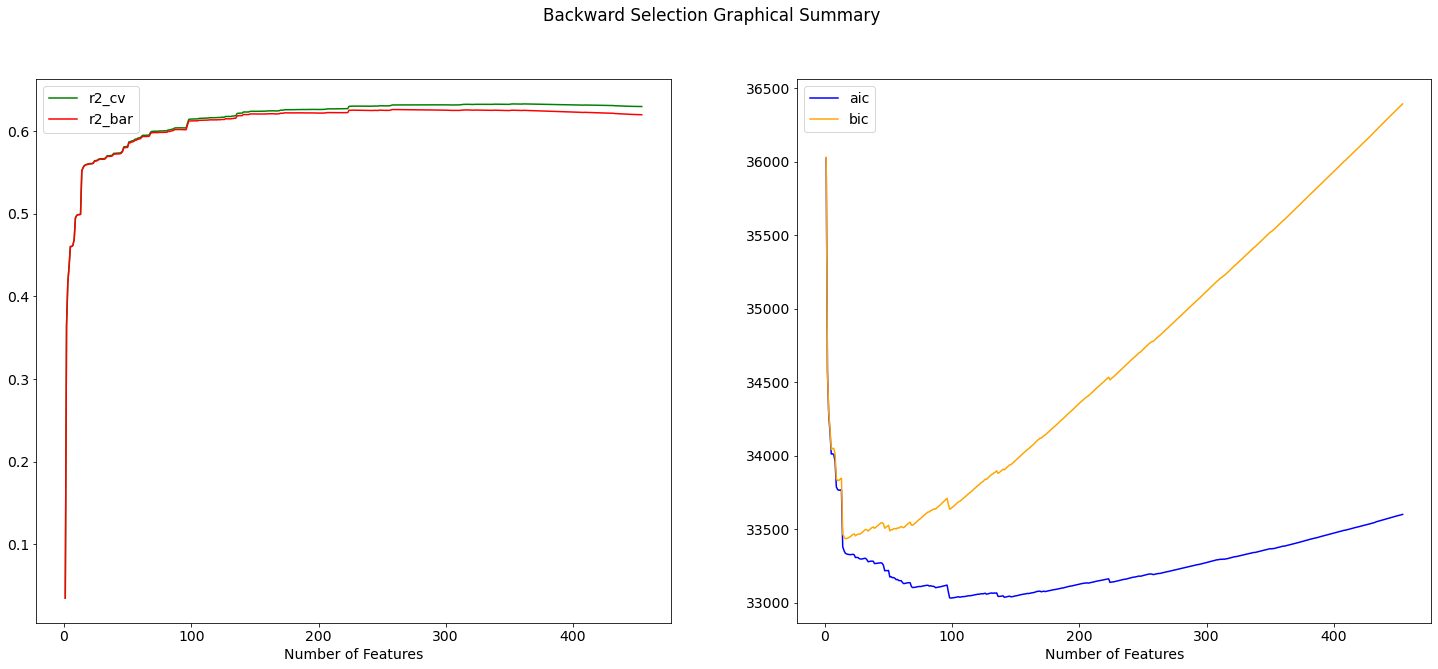

In [32]:
backwardSelection(model, X_cub, y_cub)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     76.25
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:42:40   Log-Likelihood:            -1.0606e+05
No. Observations:               17379   AIC:                         2.129e+05
Df Residuals:                   16975   BIC:                         2.161e+05
Df Model:                         403                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        164.2736  


STEPWISE SELECTION SUMMARY TABLE:

Features Added: ['x4 x8 x9', 'x0 x2 x9', 'x2 x4 x8', 'x1 x8 x10', 'x0 x1 x6', 'x1 x8^2', 'x3^2 x7', 'x6 x10', 'x7^2', 'x2^2 x3', 'x0^2 x7', 'x0 x4 x10', 'x1 x5 x7', 'x3^2 x11', 'x6 x7 x8', 'x10 x11^2', 'x3 x6 x8', 'x0 x1 x4', 'x1 x4 x5', 'x1^2 x4', 'x9 x11^2', 'x2 x3^2', 'x4 x9^2', 'x7 x11', 'x2 x4^2', 'x1 x5 x11', 'x3 x9', 'x8^3', 'x2 x9 x10', 'x3 x5 x7', 'x0^2 x6', 'x2 x9', 'x1^2 x7', 'x0 x4 x5', 'x6 x11', 'x8^2', 'x2 x9^2', 'x1 x10^2', 'x1 x6 x10', 'x2 x5 x10', 'x2 x4 x9', 'x0 x7 x10', 'x11', 'x3^2 x4', 'x8 x9 x11', 'x3 x7', 'x0 x8', 'x0 x8 x9', 'x2 x7^2', 'x5 x9^2', 'x0^2 x11', 'x2 x3 x10', 'x0 x11', 'x1 x6 x8', 'x6', 'x1 x3 x4', 'x3 x5 x6', 'x2 x9 x11', 'x4 x7^2', 'x1 x8 x9', 'x4 x5 x9', 'x2 x7 x9', 'x4 x5 x8', 'x7 x10', 'x0 x1 x10', 'x0 x8 x10', 'x1^2 x2', 'x1 x4 x8', 'x1 x4 x6', 'x1^2 x11', 'x6^2 x7', 'x2^2 x9', 'x7 x9^2', 'x7^2 x9', 'x1 x7 x10', 'x1 x4 x9', 'x7 x9', 'x2 x3 x11', 'x0 x2 x10', 'x5 x6 x9', 'x6 x8^2', 'x0 x5 x11', 'x4 x6', 'x1 x5

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


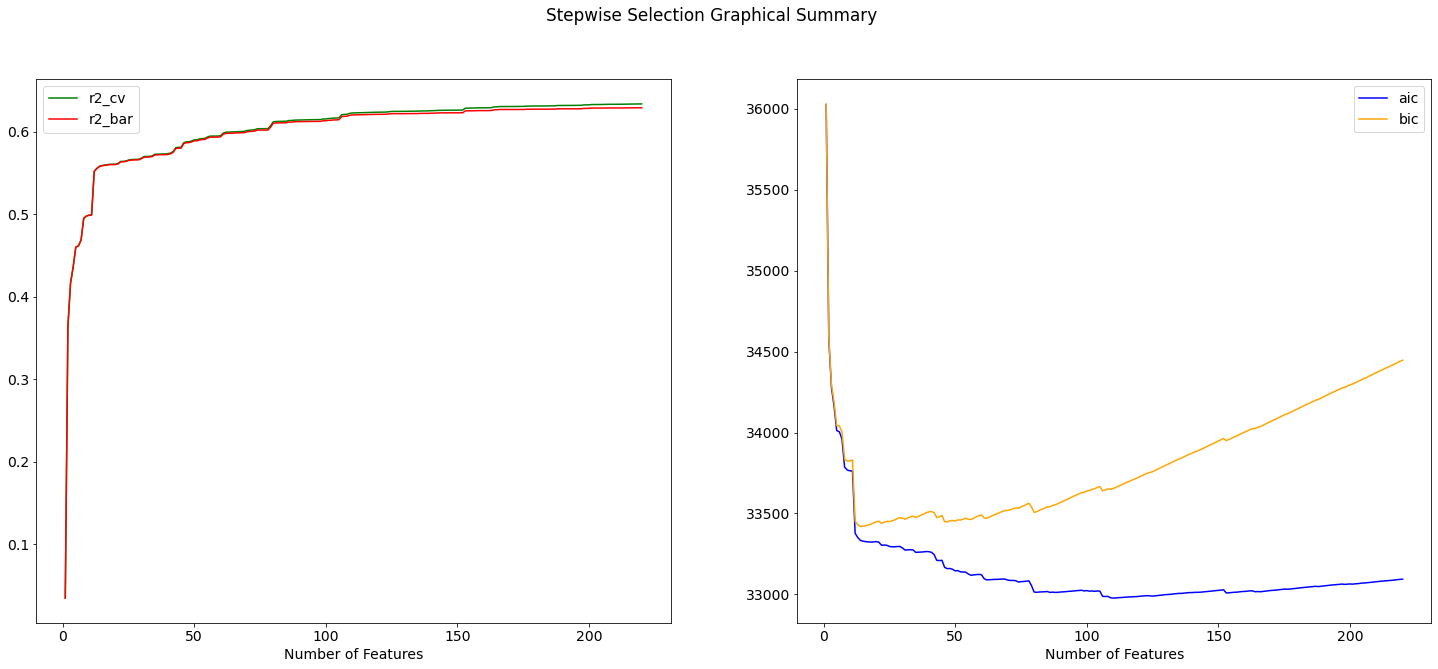

In [33]:
stepwiseSelection(model, X_cub, y_cub)